# **Momentum Gradient Descent and Nesterov Accelerated Gradient (NAG)**


---


## **Import Necessary Libraries**


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

## **Load the Data**


In [28]:
data = pd.read_csv("./Data/Multivariables_LR_Data.csv")

In [29]:
data.head()

,X1,X2,X3,y
0,73.0,80.0,75.0,152.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,90.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0


In [30]:
data.shape

(25, 4)

## **Define Variables 𝑋 and 𝑦**


In [31]:
X = data.drop("y", axis=1).values
X = np.insert(X, 0, 1, axis=1)

y = data["y"].values.reshape(-1, 1)

## **Plot Loss Function**


In [32]:
def plot_loss(loss, title="Loss over Updates", color="r", marker="o"):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(loss)), loss, f"{marker}-{color}", label="Loss")
    plt.title(title)
    plt.xlabel(f"Epochs (Total: {len(loss)})")
    plt.ylabel("Loss (J(θ))")
    plt.legend()
    plt.tight_layout()
    plt.show()

---


## **Momentum Gradient Descent**


#### **Momentum Gradient Descent Formulas**

At each step $t$:

$$
m(t) = \gamma \, m(t-1) + \alpha \, \nabla J(\theta(t))
$$

$$
\theta(t+1) = \theta(t) - m(t)
$$

---

**Where:**

- $\theta(t)$ → parameters at step $t$
- $m(t)$ → momentum term (velocity) at step $t$
- $\gamma$ → momentum coefficient (e.g., 0.9)
- $\alpha$ → learning rate
- $\nabla J(\theta(t))$ → gradient of the cost function at $\theta(t)$

---

**Explanation:**

- $m(t)$ accumulates a history of gradients, scaled by $\gamma$, to smooth the updates.
- The parameters $\theta$ are updated using this accumulated velocity.

---


In [33]:
import numpy as np


def momentum_gradient_descent(
    X,
    y,
    learning_rate=1e-5,
    gamma=0.9,
    max_iterations=100,
    gradient_tol=1e-2,
    loss_threshold=0.01,
    verbose=False,
):
    """
    Momentum Gradient Descent.

    Args:
        X (np.ndarray): Feature matrix (m, n)
        y (np.ndarray): Target vector (m, 1)
        learning_rate (float): Learning rate
        gamma (float): Momentum factor (0 < gamma < 1)
        max_iterations (int): Maximum iterations
        gradient_tol (float): Tolerance for gradient norm
        loss_threshold (float): Tolerance for loss change
        verbose (bool): If True, print detailed progress

    Returns:
        theta (np.ndarray): Final parameter values
        losses (list): List of loss values during training
    """
    m, n = X.shape
    theta = np.zeros((n, 1))
    momentum = np.zeros((n, 1))
    losses = []

    for i in range(max_iterations):
        # Compute predictions
        h_X = X @ theta

        # Compute error
        error = h_X - y

        # Compute cost (MSE)
        cost = (1 / (2 * m)) * np.sum(error**2)
        losses.append(cost)

        # Compute gradient
        gradient = (1 / m) * (X.T @ error)
        gradient_norm = np.linalg.norm(gradient)

        momentum = gamma * momentum + learning_rate * gradient
        theta -= momentum

        # Print detailed progress
        if verbose and (i % 10 == 0 or i == max_iterations - 1):
            print(f" Iteration {i+1} ".center(60, "—") + "\n")
            print("Predictions [h(x) = Xθ]:\n", h_X.ravel(), "\n")
            print("Error vector [e = h(x) - y]:\n", error.ravel(), "\n")
            print(f"Cost function [J(θ) = (1/2m) * Σ(e²)]: {cost:.6f}")
            print("Gradient [▽J(θ) = (1/m) * Σ(ex)]:\n", gradient.ravel())
            print(f"Gradient norm: {gradient_norm:.6f}\n")
            print(
                f"Momentum term [m(t) = γ * m(t-1) + α * ▽J(θ)]:\n {momentum.ravel()}\n"
            )
            print(f"Updated parameters [θ(t+1) = θ(t) - m(t)]:\n", theta.ravel(), "\n")

        # Check convergence by gradient norm
        if gradient_norm < gradient_tol:
            print(f"Convergence achieved (gradient norm) at iteration {i + 1}.")
            break

        # Check convergence by loss change
        if (i > 0) and abs(losses[-2] - losses[-1]) < loss_threshold:
            print(f"Convergence achieved (loss change) at iteration {i + 1}.")
            break

    return theta, losses

In [34]:
final_theta, momentum_loss = momentum_gradient_descent(
    X,
    y,
    learning_rate=0.00001,
    gamma=0.9,
    max_iterations=1000,
    gradient_tol=0.01,
    loss_threshold=0.01,
    verbose=True,
)

print("Final theta:", final_theta.ravel())

——————————————————————— Iteration 1 ————————————————————————

Predictions [h(x) = Xθ]:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] 

Error vector [e = h(x) - y]:
 [-152. -185. -180. -196. -142. -101. -149. -115. -175. -164. -141. -141.
 -184. -152. -148. -192. -147. -183. -177. -159. -177. -175. -175. -149.
 -192.] 

Cost function [J(θ) = (1/2m) * Σ(e²)]: 13405.980000
Gradient [▽J(θ) = (1/m) * Σ(ex)]:
 [  -162.04 -13075.8  -13147.2  -13467.08]
Gradient norm: 22917.545989

Momentum term [m(t) = γ * m(t-1) + α * ▽J(θ)]:
 [-0.0016204 -0.130758  -0.131472  -0.1346708]

Updated parameters [θ(t+1) = θ(t) - m(t)]:
 [0.0016204 0.130758  0.131472  0.1346708] 

——————————————————————— Iteration 11 ———————————————————————

Predictions [h(x) = Xθ]:
 [157.95749104 189.86741146 187.0697914  203.74365613 144.80044664
 106.77359481 152.52002151 113.08361601 177.46135462 164.39702744
 146.93950059 144.89699153 193.25854426 160.64061084 153.22479834
 192.6791592  152.9

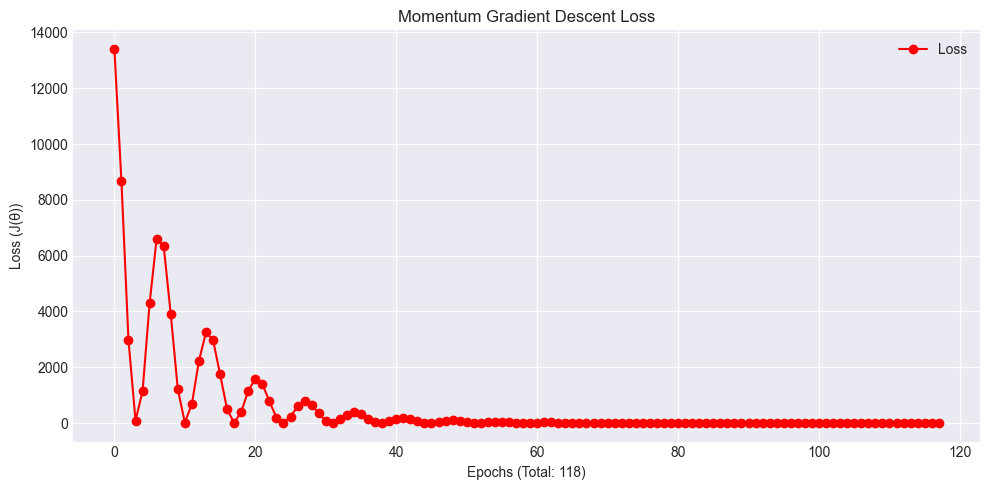

In [35]:
plot_loss(momentum_loss, title="Momentum Gradient Descent Loss")

---


## **Nesterov Accelerated Gradient (NAG)**


#### **Nesterov Accelerated Gradient (NAG) Formulas**

**1.Lookahead position**

$$
\theta_{lookahead(t)} = \theta_{(t)} - \gamma m_{(t-1)}
$$

_Compute a lookahead position using the momentum from the previous step._

---

**2.Momentum update**

$$
m_{(t)} = \gamma m_{(t-1)} + \alpha \nabla J(\theta_{lookahead(t)})
$$

_Update the momentum term using the lookahead gradient._

---

**3.Parameter update**

$$
\theta_{t+1} = \theta_{(t)} - m_{(t)}
$$

_Update the parameters using the new momentum._

---

**Explanation of Terms**

| Symbol                            | Meaning                                 |
| --------------------------------- | --------------------------------------- |
| $\theta$                          | Parameter vector                        |
| $m$                               | Momentum vector                         |
| $\gamma$                          | Momentum coefficient (typically \~0.9)  |
| $\alpha$                          | Learning rate                           |
| $J(\theta)$                       | Cost function (e.g. Mean Squared Error) |
| $\nabla J(\theta_{lookahead(t)})$ | Gradient at lookahead position          |

---


In [36]:
import numpy as np


def nesterov_accelerated_gradient(
    X,
    y,
    learning_rate=1e-5,
    gamma=0.9,
    max_iterations=100,
    gradient_tol=1e-2,
    loss_threshold=0.01,
    verbose=False,
):
    """
    Nesterov Accelerated Gradient (NAG) Descent.

    Args:
        X (np.ndarray): Feature matrix (m, n)
        y (np.ndarray): Target vector (m, 1)
        learning_rate (float): Learning rate
        gamma (float): Momentum factor (0 < gamma < 1)
        max_iterations (int): Maximum iterations
        gradient_tol (float): Tolerance for gradient norm
        loss_threshold (float): Tolerance for loss change
        verbose (bool): If True, print detailed progress

    Returns:
        theta (np.ndarray): Final parameter values
        losses (list): List of loss values during training
    """
    m, n = X.shape
    theta = np.zeros((n, 1))
    momentum = np.zeros((n, 1))
    losses = []

    for i in range(max_iterations):
        # Compute lookahead position
        lookahead_theta = theta - gamma * momentum

        # Compute predictions at lookahead
        h_X = X @ lookahead_theta
        error = h_X - y

        # Cost
        cost = (1 / (2 * m)) * np.sum(error**2)
        losses.append(cost)

        # Gradient at lookahead
        gradient = (1 / m) * (X.T @ error)
        gradient_norm = np.linalg.norm(gradient)

        # Update momentum and parameters
        momentum = gamma * momentum + learning_rate * gradient
        theta = theta - momentum

        # Verbose output
        if verbose and (i % 10 == 0 or i == max_iterations - 1):
            print(f" Iteration {i+1} ".center(60, "—") + "\n")
            print(
                f"Lookahead position [θ' = θ - γ * m(t-1)]:\n",
                lookahead_theta.ravel(),
                "\n",
            )
            print("Predictions [h(x) = Xθ']:\n", h_X.ravel(), "\n")
            print("Error vector [e = h(x) - y]:\n", error.ravel(), "\n")
            print(f"Cost function [J(θ) = (1/2m) * Σ(e²)]: {cost:.6f}")
            print("Gradient [▽J(θ') = (1/m) * Σ(ex)]:\n", gradient.ravel())
            print(f"Gradient norm: {gradient_norm:.6f}\n")
            print(
                f"Momentum term [m(t) = γ * m(t-1) + α * ▽J(θ')]:\n {momentum.ravel()}\n"
            )
            print(f"Updated parameters [θ(t+1) = θ(t) - m(t)]:\n", theta.ravel(), "\n")

        # Convergence checks
        if gradient_norm < gradient_tol:
            print(f"Converged by gradient norm at iteration {i+1}")
            break

        if i > 0:
            loss_change = abs(losses[-1] - losses[-2])
            if loss_change < loss_threshold:
                print(f"Converged by loss change at iteration {i+1}")
                break

    return theta, losses

In [37]:
final_theta, nag_loss = nesterov_accelerated_gradient(
    X,
    y,
    learning_rate=0.00001,
    gamma=0.9,
    max_iterations=1000,
    gradient_tol=0.01,
    loss_threshold=0.01,
    verbose=True,
)

print("Final theta:", final_theta.ravel())

——————————————————————— Iteration 1 ————————————————————————

Lookahead position [θ' = θ - γ * m(t-1)]:
 [0. 0. 0. 0.] 

Predictions [h(x) = Xθ']:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] 

Error vector [e = h(x) - y]:
 [-152. -185. -180. -196. -142. -101. -149. -115. -175. -164. -141. -141.
 -184. -152. -148. -192. -147. -183. -177. -159. -177. -175. -175. -149.
 -192.] 

Cost function [J(θ) = (1/2m) * Σ(e²)]: 13405.980000
Gradient [▽J(θ') = (1/m) * Σ(ex)]:
 [  -162.04 -13075.8  -13147.2  -13467.08]
Gradient norm: 22917.545989

Momentum term [m(t) = γ * m(t-1) + α * ▽J(θ')]:
 [-0.0016204 -0.130758  -0.131472  -0.1346708]

Updated parameters [θ(t+1) = θ(t) - m(t)]:
 [0.0016204 0.130758  0.131472  0.1346708] 

——————————————————————— Iteration 11 ———————————————————————

Lookahead position [θ' = θ - γ * m(t-1)]:
 [0.00792396 0.63832021 0.64157346 0.66277494] 

Predictions [h(x) = Xθ']:
 [147.63929665 177.46823745 174.85135217 190.43835727 135.343393

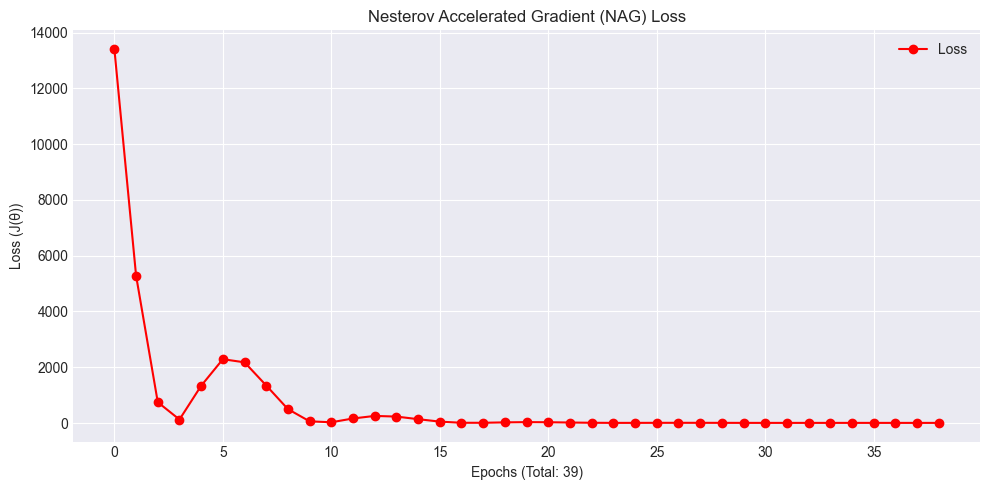

In [38]:
plot_loss(nag_loss, title="Nesterov Accelerated Gradient (NAG) Loss")

---


## **Momentum vs NAG Loss Comparison**


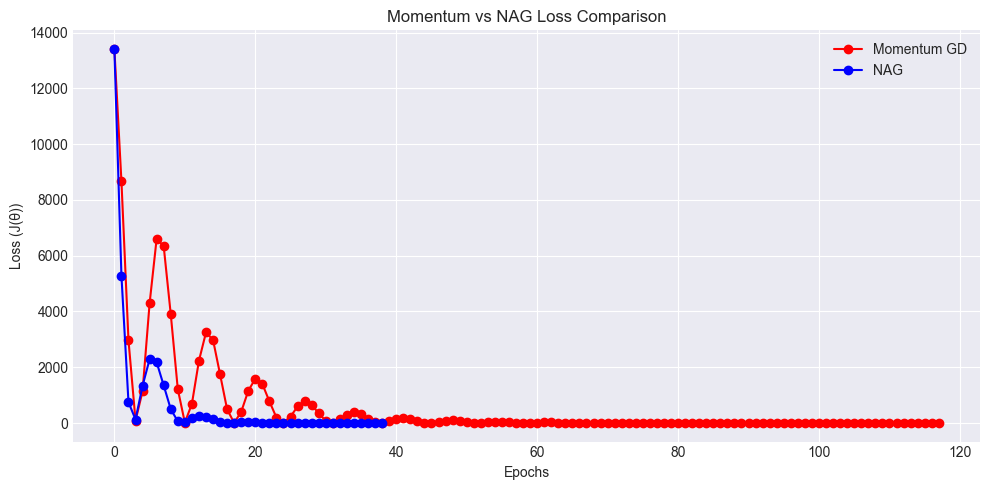

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(momentum_loss, "o-r", label="Momentum GD")
plt.plot(nag_loss, "o-b", label="NAG")
plt.title("Momentum vs NAG Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss (J(θ))")
plt.legend()
plt.tight_layout()
plt.show()

---
